<a href="https://colab.research.google.com/github/nischitabiradar/Python-LSTM-Stock-Prediction/blob/main/LSTM_Model_Predicting_Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This program uses an artificial recurrent neural network called Long Short Term Memory to predict the closing stock price of Apple Inc. using the past 60 day stock prices.**

In [1]:
#importing libraries
import math
import numpy as np
from pandas_datareader import data as pdr #TO TAKE DATA FROM YAHOO
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler #DATA TRANSFORMATION AND SCALING
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')
import yfinance as yf
yf.pdr_override()


In [2]:
#Get the stock quote and display it
df = pdr.get_data_yahoo('AAPL', start = "2013-01-01", end = "2022-12-31")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.791183,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.579247,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.117439,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.022627,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.065748,458707200
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477585,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400


<function matplotlib.pyplot.show(close=None, block=None)>

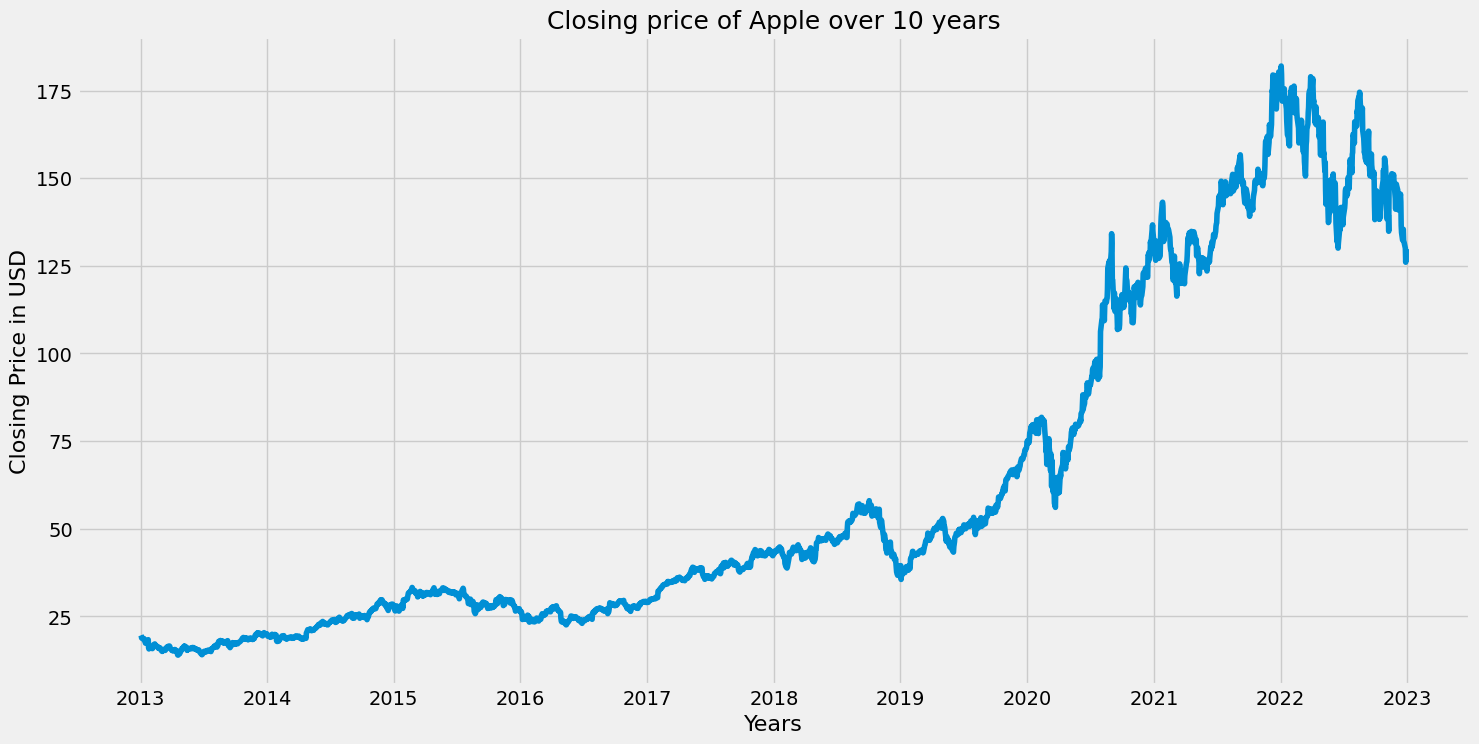

In [3]:
plt.figure(figsize=(16,8))
plt.title('Closing price of Apple over 10 years',fontsize=18)
plt.plot(df['Close'])
plt.xlabel('Years',fontsize=16)
plt.ylabel('Closing Price in USD',fontsize=16)
plt.show

In [4]:
#Create a dataframe that only contains closing data
data= df.filter(['Close'])
#Convert this to a numpy array
dataset= data.values
data.head()

,Close
Date,
2013-01-02,19.608213
2013-01-03,19.360714
2013-01-04,18.821428
2013-01-07,18.710714
2013-01-08,18.761070



We are now going to begin training the model to predict future closing prices. We are going to train it to 80% of the dataset. After that, we are going to scale the data, i.e convert it to a scale of 0 to 1. It is important for neural networks to work with normalized data.


In [5]:
#Obtain the number of rows to be used for training
training_data_length= math.ceil(len(dataset) * .8)
print(training_data_length)

2015


In [6]:
#Scale the Data
scaler= MinMaxScaler(feature_range=(0,1))
scaled_dataset= scaler.fit_transform(dataset)
print(scaled_dataset)

[[0.03368219]
 [0.03220953]
 [0.02900069]
 ...
 [0.66696916]
 [0.68821126]
 [0.69011526]]


Now, we are going to create the training dataset. We will split the data into x_train and y_train. x will be the independent variable, and y will be the dependent variable.

In [7]:
train_data= scaled_dataset[0:training_data_length, : ]
x_train= []
y_train= []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.03368219, 0.03220953, 0.02900069, 0.02834192, 0.02864155,
       0.02689688, 0.02825905, 0.02757691, 0.02363492, 0.02027095,
       0.02455719, 0.02383254, 0.02326303, 0.02427668, 0.02624024,
       0.01274399, 0.01048717, 0.0126016 , 0.01439515, 0.01408915,
       0.01380439, 0.013407  , 0.01100568, 0.01430378, 0.01419965,
       0.01650959, 0.01794613, 0.01899803, 0.01644159, 0.01625246,
       0.01616321, 0.01479679, 0.01476066, 0.01239335, 0.01180045,
       0.01280986, 0.01110769, 0.01241885, 0.01148382, 0.01081018,
       0.00848749, 0.00627318, 0.00862986, 0.00746533, 0.00851086,
       0.00875312, 0.01006003, 0.00805397, 0.00803697, 0.00891888,
       0.01129044, 0.01385327, 0.01359189, 0.01307974, 0.01321787,
       0.01516868, 0.01552356, 0.01500505, 0.01307974, 0.01107794])]
[0.008155979080942843]

[array([0.03368219, 0.03220953, 0.02900069, 0.02834192, 0.02864155,
       0.02689688, 0.02825905, 0.02757691, 0.02363492, 0.02027095,
       0.02455719, 0.02383254, 0.0

In [8]:
print(len(x_train))
print(len(y_train))

1955
1955


In [12]:
#Convert the x_train and y_train datasets to numpy arrays
x_train= np.array(x_train)
y_train= np.array(y_train)

In [13]:
#Reshape the x_train data to convert it to 3D
print(x_train.shape)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

(1955, 60, 1)


In [14]:
#Build the LSTM Model
model= Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
#Compile the model
model.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [16]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1955/1955 [==============================] - 38s 17ms/step - loss: 7.4657e-04


In [17]:
#Create the testing dataset
#Create a new array containing scaled values containing values from index 1955 (end point above) to 2455
test_data= scaled_dataset[training_data_length - 60:, :]
#Create the x data set and y dataset for testing
x_test = []
y_test = dataset[training_data_length:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [18]:
#Conver the data to a numpy array
x_test= np.array(x_test)

In [19]:
#Reshape the 2D data again
x_test= np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [20]:
#Get the predicted values from the model
predictions= model.predict(x_test)
#unscale the values so we can see the actual price
predictions= scaler.inverse_transform(predictions)

16/16 [==============================] - 1s 15ms/step


In [21]:
#Get the Root Mean Squared Error (RMSE), lower the RMSE, better the fit
rmse= np.sqrt(np.mean(predictions- y_test) ** 2)
print(rmse)

4.7375113181992035


In [22]:
#Validate the predicted data
train= data[:training_data_length]
valid= data[training_data_length:]
valid['Predictions']= predictions

<ipython-input-22-7b12b39af2d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


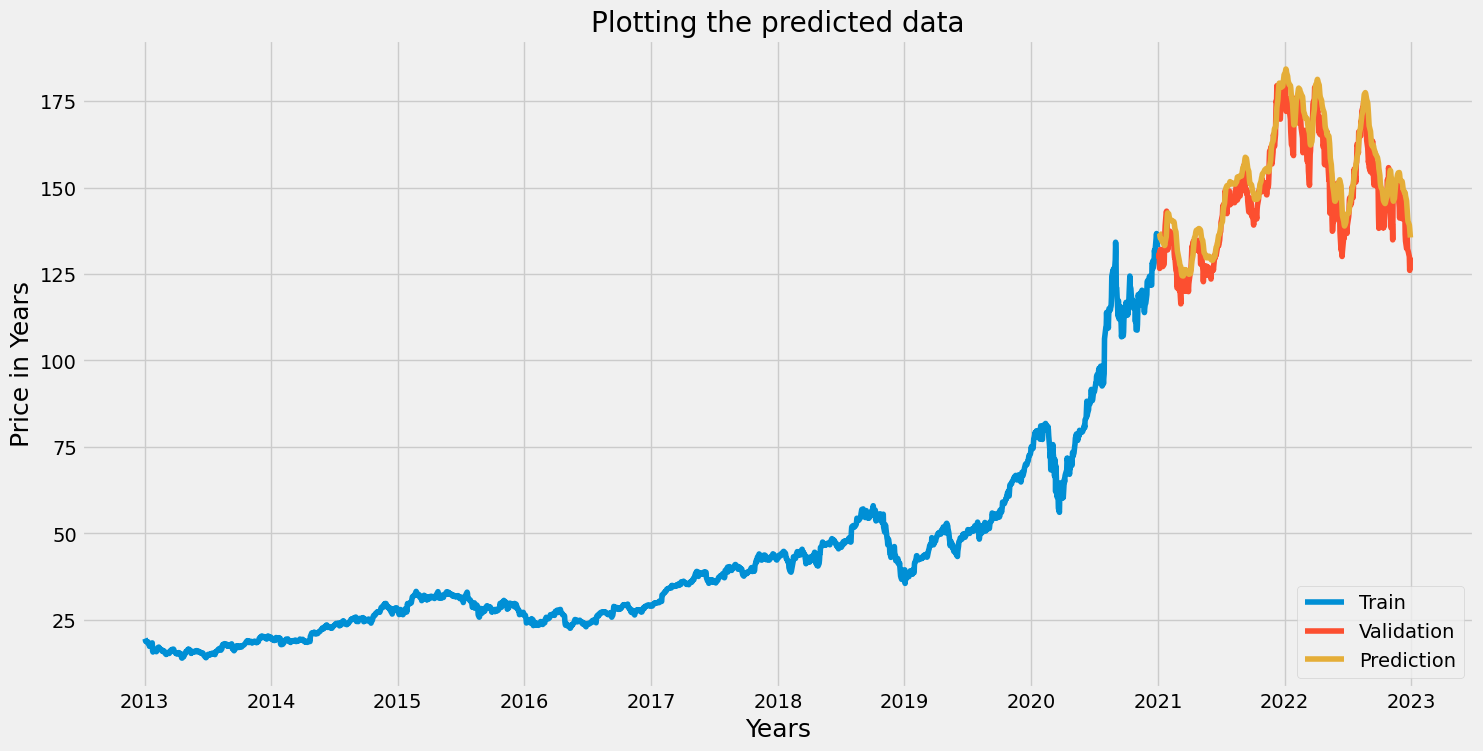

In [23]:
#Visualize the predicted data
plt.figure(figsize= (16,8))
plt.title('Plotting the predicted data')
plt.xlabel('Years', fontsize= 18)
plt.ylabel('Price in Years', fontsize= 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Prediction'], loc='lower right')

The yellow line is the actual prediction of prices from the model. The red line is the the actual data. This shows that our model tracks the actual performance fairly well, including the dip right at the end.

In [24]:
#Compare the predicted prices to the actual prices
valid

,Close,Predictions
Date,,
2021-01-04,129.410004,136.947006
2021-01-05,131.009995,136.819595
2021-01-06,126.599998,136.582138
2021-01-07,130.919998,135.787354
2021-01-08,132.050003,135.315414
...,...,...
2022-12-23,131.860001,140.218399
2022-12-27,130.029999,139.151413
2022-12-28,126.040001,138.047318
